In [5]:
import model
import fitness
import numpy as np
from scipy.stats import linregress
from matplotlib import pyplot as plt
from scipy.stats import kstest

In [2]:
""" some additional functions for generating averaged plots """

def get_node_degrees(net, size):
    """
    Returns degree over time for every node 
    """
    node_degrees = []
    times = []
    for i in range(size):
        k, t = net.get_degree_wrt_time(i)
        node_degrees.append(k)
        times.append(t)

    return times, node_degrees

def simulate(size, iterations, fitness):
    """
    Runs model 'iterations' times
    Returns list of final states of the network for each run
    """
    node_degrees = []
    times = []

    for i in range(iterations):
        network = model.network()
        network.generator.fitness_data = fitness
        network.set_fitness_distr('data')
        network.generate_network(size)
        
        t, k = get_node_degrees(network, size)
        node_degrees.append(k)
        times.append(t)

    return times, node_degrees, network

def clone_shape(arr):
    """
    Creates copy of multidimensional list filled with zeros
    Additional function for get_means()
    """
    res = []
    for x in arr:
        res.append(np.zeros_like(x))
    return res

def get_means(arr):
    """
    Calculates average degrees for all nodes over time for multiple model runs
    Input:
        Result array from simulate()
    """
    summ = clone_shape(arr[0])
    for i in range(len(arr)):
        for j in range(len(arr[i])):
            for k in range(len(arr[i][j])):
                summ[j][k] += arr[i][j][k]

    means = [[value / len(arr) for value in subarr] for subarr in summ]

    return means


def estimate_beta(degrees, times):
    """
    Estimates fitness distribution (which theoretically is the same as beta distribution)
    according to the method from the book
    """
    lnk = [np.log(x) for x in degrees]
    lnt = [np.log(t) for t in times]

    # Estimating betas using linear regression
    beta = []
    for i in range(len(lnk)):
        if len(lnk[i]) < 10:
            continue

        slope, intercept, _, _, _ = linregress(lnt[i], lnk[i])
    
        if slope > 0:
            beta.append(slope)
    
    return beta

Text(0.5, 1.0, 'Fitness Distribution')

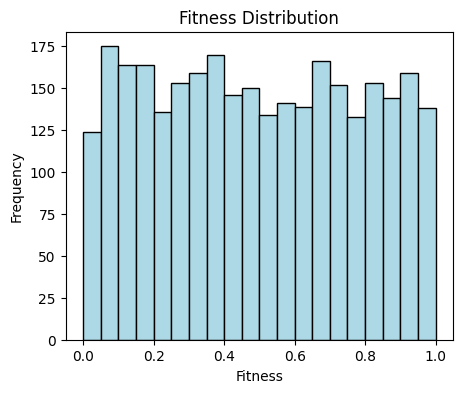

In [8]:
""" beta estimation on NOT averaged simulation (does not work properly) """

network = model.network()
network.set_fitness_distr('uniform')
size = 3000
G = network.generate_network(size)

data = G

fitness_values = [fitness for _, (_, fitness) in data.items()]

plt.figure(figsize=(5,4))
plt.hist(fitness_values, bins=20, color='lightblue', edgecolor='black')
plt.xlabel("Fitness")
plt.ylabel("Frequency")
plt.title("Fitness Distribution")

C:\Users\Leont\AppData\Local\Temp\ipykernel_20964\1830767605.py:14: RuntimeWarning: divide by zero encountered in log
  lnt = [np.log(t) for t in times]


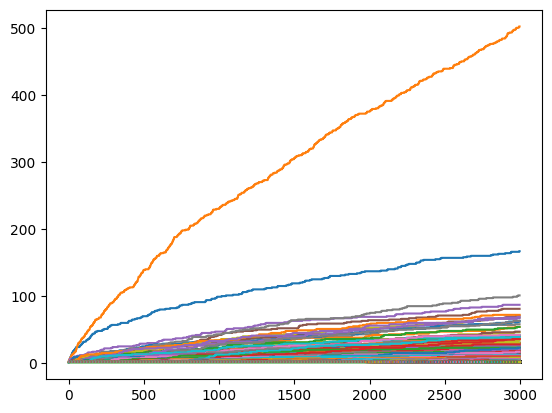

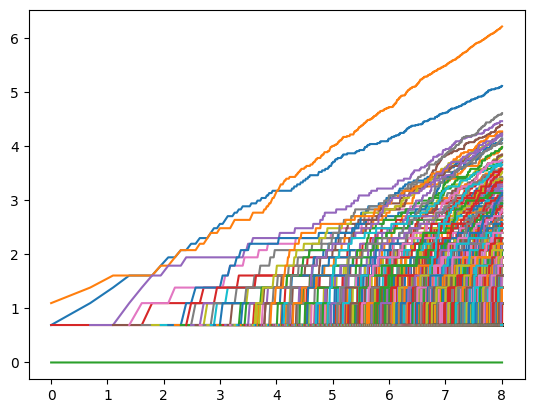

In [9]:
""" Degree dynamics over time for each node """

node_degrees = []
times = []
for i in range(size):
    k, t = network.get_degree_wrt_time(i)
    node_degrees.append(k)
    times.append(t)

for i in range(len(times)):
    plt.plot(times[i], node_degrees[i])

lnk = [np.log(x) for x in node_degrees]
lnt = [np.log(t) for t in times]

plt.figure()
for i in range(len(lnk)):
    plt.plot(lnt[i], lnk[i])
    

C:\Users\Leont\AppData\Local\Temp\ipykernel_20964\3917182519.py:3: RuntimeWarning: divide by zero encountered in log
  lnt = [np.log(t) for t in times]


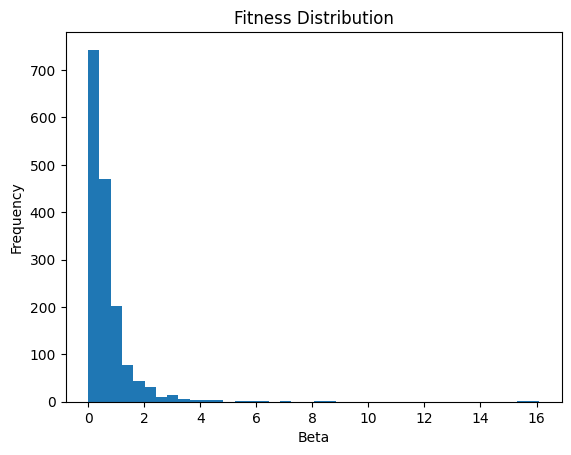

In [11]:
""" the distribution here must be approximately uniform from 0 to 1 """

degrees_new, times_new = node_degrees, times

beta = estimate_beta(degrees_new, times_new)

# Plotting the fitness (beta) distribution histogram
plt.figure()
plt.hist(beta, bins=40)
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.title('Fitness Distribution')
plt.show()

In [10]:
""" beta estimation on averaged simulation

    estimation is far from good for uniform, but seems to work overall """

size = 5000
iterations = 100
rng = np.random.default_rng(1234)
fitness_data = rng.random(size)

times, node_degrees, network_uniform = simulate(size, iterations, fitness_data)

mean_degrees_uniform = get_means(node_degrees)

C:\Users\Leont\AppData\Local\Temp\ipykernel_8760\4147002401.py:69: RuntimeWarning: divide by zero encountered in log
  lnt = [np.log(t) for t in times]


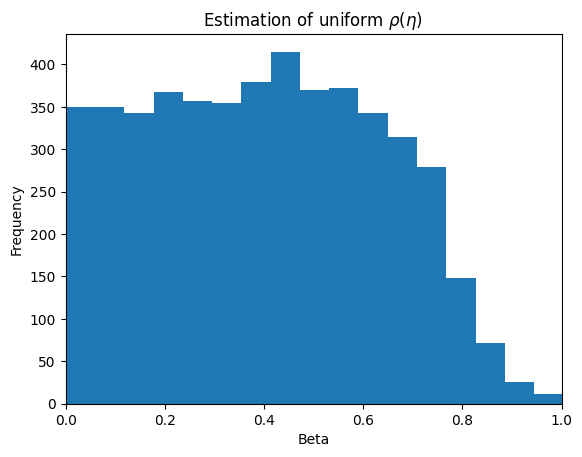

In [ ]:
degrees_new, times_new = mean_degrees_uniform, times[0]

beta = estimate_beta(degrees_new, times_new)

# Plotting the fitness (beta) distribution histogram
plt.figure()
plt.hist(beta, bins=100)
plt.xlabel('Fitness')
plt.ylabel('Frequency')
plt.title(r'Estimation of uniform $ \rho(\eta) $ ')
plt.xlim(0,1)
plt.savefig('uniform_fitness_estimation.png', dpi=400)

In [4]:
""" for exponential fitness """

size = 5000
iterations = 100
rng = np.random.default_rng(1234)
fitness_data = rng.exponential(1.0, size)

times, node_degrees, network_exp = simulate(size, iterations, fitness_data)

mean_degrees = get_means(node_degrees)

C:\Users\Leont\AppData\Local\Temp\ipykernel_9552\4147002401.py:69: RuntimeWarning: divide by zero encountered in log
  lnt = [np.log(t) for t in times]
C:\Users\Leont\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\lib\function_base.py:2699: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


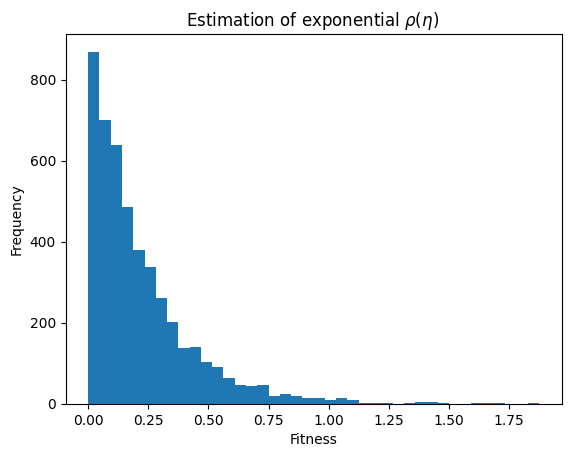

In [5]:
degrees_new, times_new = mean_degrees, times[0]

beta = estimate_beta(degrees_new, times_new)

plt.figure()
plt.hist(beta, bins=40)
plt.xlabel('Fitness')
plt.ylabel('Frequency')
plt.title(r'Estimation of exponential $ \rho(\eta) $ ')
plt.savefig('exp_fitness_estimation.png', dpi=400)

In [18]:
import fitness

generator = fitness.generator()

generator.set_current_distribution('beta')
generator.set_param_beta(2, 2)

n_samples = 3000

# Generate values
y_samples = []

for _ in range(n_samples):
    y_samples.append(generator.generate_value())

In [24]:
fitness_data = y_samples

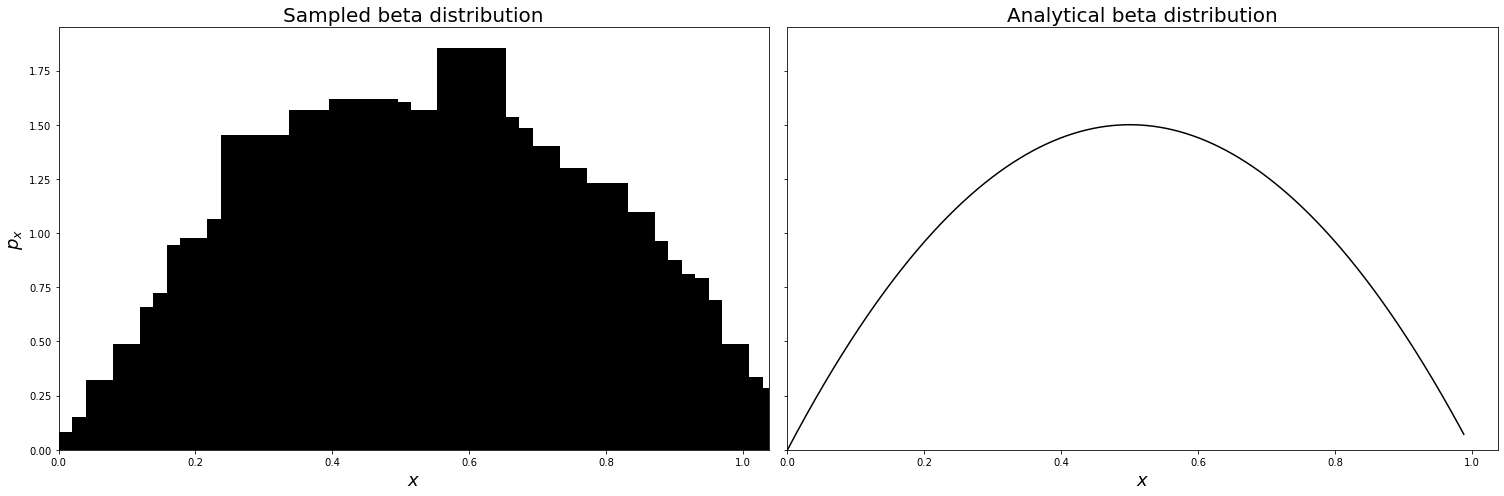

In [21]:
# Plot the distribution
fig, axs = plt.subplots(1,2, figsize=(21, 7), sharex=True, sharey=True)
_, bins,_ = axs[0].hist(y_samples, density=True, bins = 50, width=0.1, color = 'black')
axs[0].set_title('Sampled beta distribution', fontsize = 20)
axs[0].set_ylabel('$p_x$', fontsize=18)

axs[1].plot(np.linspace(0, max(bins), 1000), [scipy.stats.beta.pdf(x, 2, 2) for x in np.linspace(0, max(bins), 1000)], color = 'black')
axs[1].set_title('Analytical beta distribution', fontsize = 20)
for ax in axs:
    ax.set_xlim(left=0)
    ax.set_xlabel('$x$', fontsize=18)

plt.tight_layout()
plt.show()

In [31]:
""" for beta fitness distribution """

size = 3000
iterations = 20

times, node_degrees = simulate(size, iterations, fitness_data)

mean_degrees = get_means(node_degrees)

C:\Users\Leo\AppData\Local\Temp\ipykernel_15736\3917182519.py:3: RuntimeWarning: divide by zero encountered in log
  lnt = [np.log(t) for t in times]


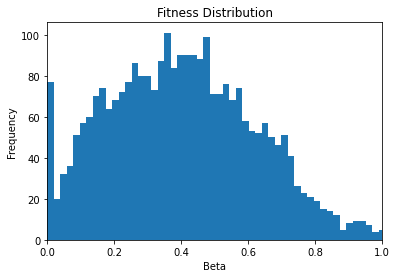

In [32]:
degrees_new, times_new = mean_degrees, times[0]

beta = estimate_beta(degrees_new, times_new)

plt.hist(beta, bins=300)
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.title('Fitness Distribution')
plt.xlim(0, 1)
plt.show()

In [6]:
generator = fitness.generator()

generator.set_current_distribution('be')
generator.set_param_beta(2, 2)

n_samples = 5000

# Generate values
y_samples = []

for _ in range(n_samples):
    y_samples.append(generator.generate_value())

fitness_data = y_samples

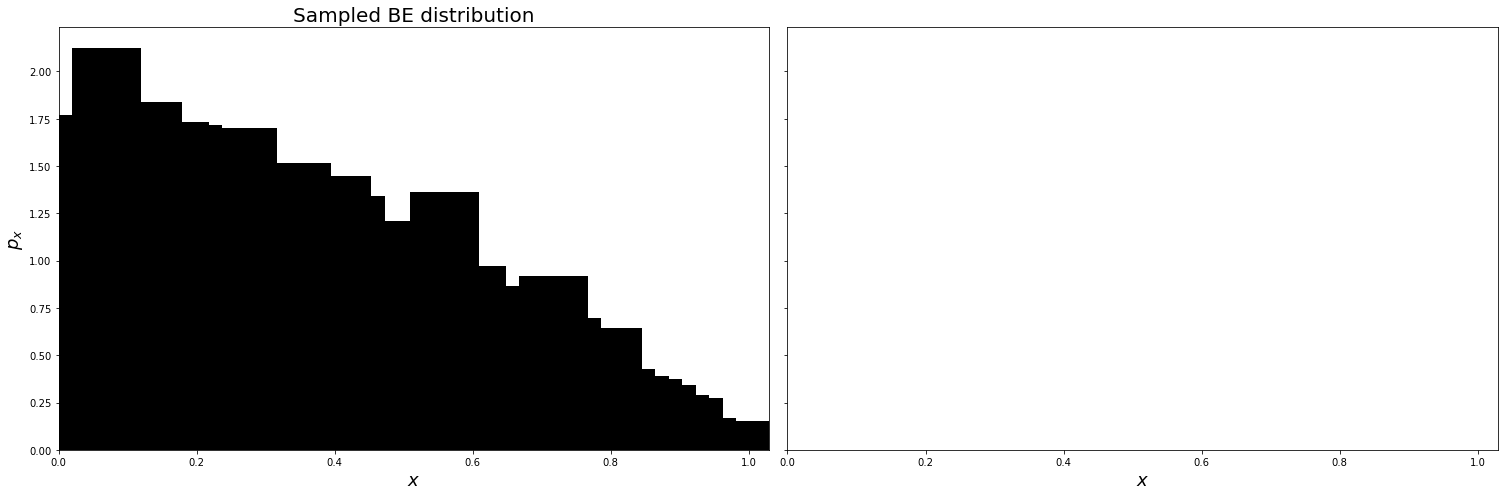

In [38]:
# Plot the distribution
fig, axs = plt.subplots(1,2, figsize=(21, 7), sharex=True, sharey=True)
_, bins,_ = axs[0].hist(y_samples, density=True, bins = 50, width=0.1, color = 'black')
axs[0].set_title('Sampled BE distribution', fontsize = 20)
axs[0].set_ylabel('$p_x$', fontsize=18)

for ax in axs:
    ax.set_xlim(left=0)
    ax.set_xlabel('$x$', fontsize=18)

plt.tight_layout()
plt.show()

In [11]:
""" for beta fitness distribution """

size = n_samples
iterations = 100

times, node_degrees, network_be = simulate(size, iterations, fitness_data)

mean_degrees_be = get_means(node_degrees)

C:\Users\Leont\AppData\Local\Temp\ipykernel_11000\4147002401.py:69: RuntimeWarning: divide by zero encountered in log
  lnt = [np.log(t) for t in times]


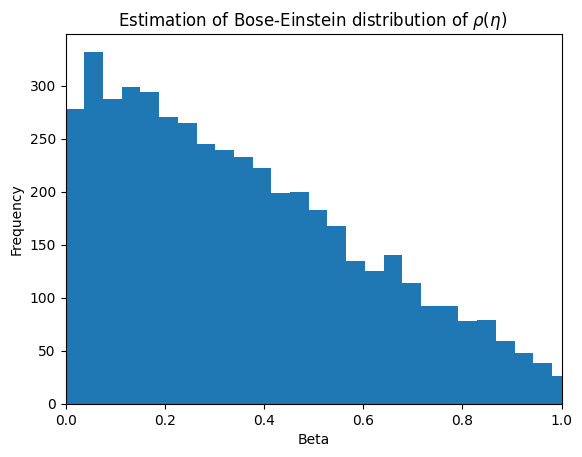

In [13]:
degrees_new, times_new = mean_degrees_be, times[0]

beta = estimate_beta(degrees_new, times_new)

plt.hist(beta, bins=100)
plt.xlabel('Beta')
plt.ylabel('Frequency')
plt.title(r'Estimation of Bose-Einstein distribution of $ \rho(\eta) $ ')
plt.xlim(0, 1)
plt.savefig('be_fitness_estimation.png', dpi=400)

In [ ]:
ks_statistic, p_value = kstest(fitness_data, beta)

# Print the test results
print("KS statistic:", ks_statistic)
print("P-value:", p_value)